# Plotting data with matplotlib

Plotting of data is pandas is handled by an external Python module called *matplotlib*. Like pandas it is a large library and has a venerable history (first released in 2003) and so we couldn't hope to cover all its functionality in this course. To see the wide range of possibilities you have with matplotlib see its [example gallery](http://matplotlib.org/gallery.html).

Here we will cover the basic uses of it, first looking at how it integrates with pandas and then how numpy works with it. While working through these examples you will likely find it very useful to refer to the [matplotlib documentation](http://matplotlib.org/api/pyplot_api.html).

First we import pandas in the same way as we did previously.

In [1]:
import pandas as pd
from pandas import Series, DataFrame

Some matplotlib functionality is provided directly through pandas (such as the `plot()` metho as we will see) but for much of it you need to import the matplotlib interface itself.

The most common interface to matplotlib is its `pyplot` module which provides a way to affect the current state of matplotlib directly. [By convention](http://matplotlib.org/faq/usage_faq.html#coding-styles) this is imported as `plt`.

In [2]:
import matplotlib.pyplot as plt

Once we have imported matplotlib we can start calling its functions. Any functions called on the `plt` object will affect all of matplotlib from that point on in the script.

We first need to import some data to plot. Let's start with the data from the pandas section (available from [cetml1659on.dat](https://raw.githubusercontent.com/milliams/data_analysis_python/master/cetml1659on.dat)) and import it into a `DataFrame`:

In [4]:
df = pd.read_csv(
    'cetml1659on.dat',  # file name
    skiprows=6,  # skip header
    sep='\s+',  # whitespace separated
    na_values=['-99.9', '-99.99'],  # NaNs
)
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63


Pandas integrates matplotlib directly into itself so any dataframe can be plotted easily simply by calling the `plot()` method on one of the columns. This creates a plot object which you can then edit and alter, for example by setting the axis labels using the `plt.ylabel()` function before displaying it with `plt.show()`.

Matplotlib operates on a single global state and calling any function on `plt` will alter that state. Calling `df.plot()` sets the *currently operating* plot. `plt.ylabel()` then alters that state and `plt.show()` displays it.

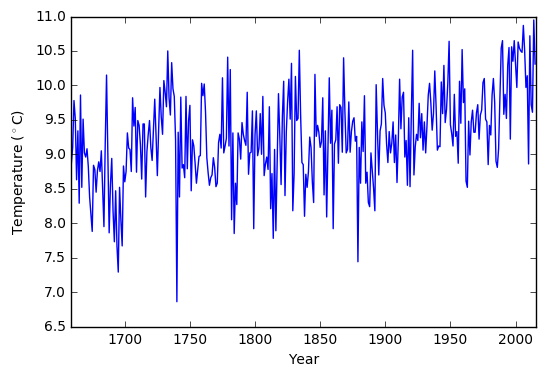

In [5]:
df['YEAR'].plot()

plt.ylabel(r'Temperature ($^\circ$C)')

plt.show()

### Exercise

Make sure you can reproduce the plot above. Try tweaking the labels or which column is plotted.

## Simple plot

Since Pandas is based upon numpy, there is very good integration between matplotlib and numpy too. Let's start by creating some simply numpy arrays:

In [6]:
import numpy as np

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

Can you work out what these variables `C` abd `S` contain? Remember the use of `np.linspace()` from the last section and note the use of the variable `np.pi` which gives us the constant $\pi$.

It's just as easy to plot numpy data as it is pandas data, it has almost the same interface. We use the `plt.plot()` function to add an array to the data to be plotted:

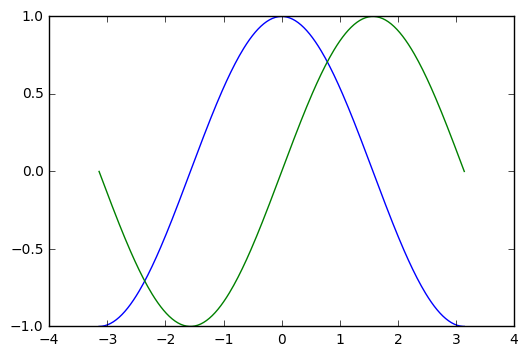

In [7]:
plt.plot(X, C)
plt.plot(X, S)

plt.show()

You can see that it has plotted the sine and cosine curves between $\pi$ and $-\pi$. Now, let's go through and see how we can affect the display of this plot.

As you go through these examples, you can do it one single cell, editing it each step to add in the new code added each time.

### Changing colours and line widths

First step, we want to have the cosine in blue and the sine in red and a slighty thicker line for both of them. We’ll also slightly alter the figure size to make it more horizontal.

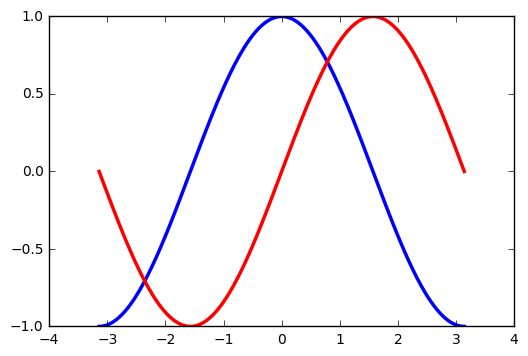

In [9]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

plt.show()

### Setting limits

Current limits of the figure are a bit too tight and we want to make some space in order to clearly see all data points.

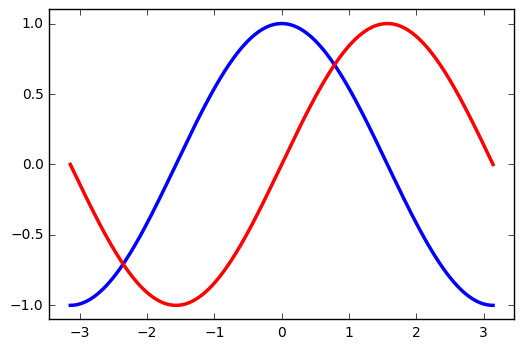

In [10]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

### New code
plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)
### End of new code

plt.show()

### Setting ticks

Current ticks are not ideal because they do not show the interesting values ($\pm\pi$,$\pm\frac{\pi}{2}$) for sine and cosine. We’ll change them such that they show only these values.

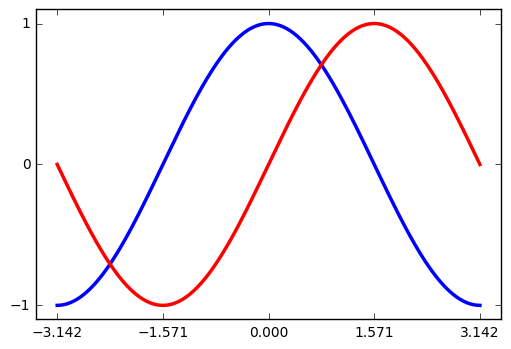

In [17]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)

### New code
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])
### End of new code

plt.show()

### Setting tick labels

Ticks are now properly placed but their label is not very explicit. We could guess that 3.142 is $\pi$ but it would be better to make it explicit. When we set tick values, we can also provide a corresponding label in the second argument list. Note that we’ll use LaTeX to allow for nice rendering of the label.

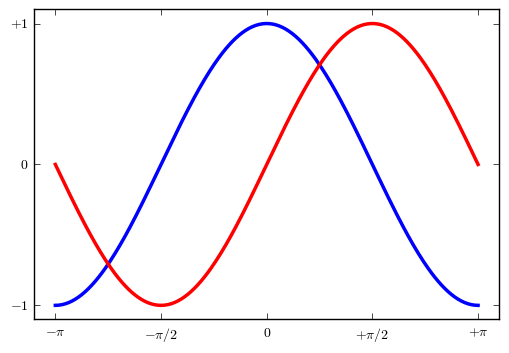

In [18]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

### New code
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])
### End of new code

plt.show()

### Moving spines

Spines are the lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions and until now, they were on the border of the axis. We’ll change that since we want to have them in the middle. Since there are four of them (top/bottom/left/right), we’ll discard the top and right by setting their color to none and we’ll move the bottom and left ones to coordinate 0 in data space coordinates.

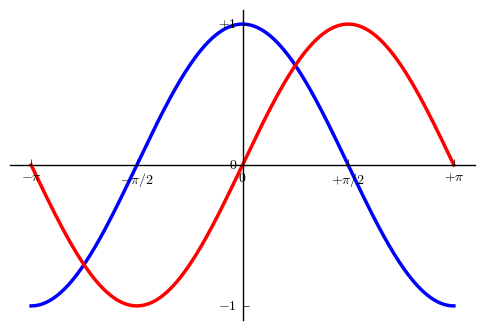

In [19]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])

### New code
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
### End of new code

plt.show()

### Adding a legend

Let’s add a legend in the upper left corner. This only requires adding the keyword argument label (that will be used in the legend box) to the plot commands.

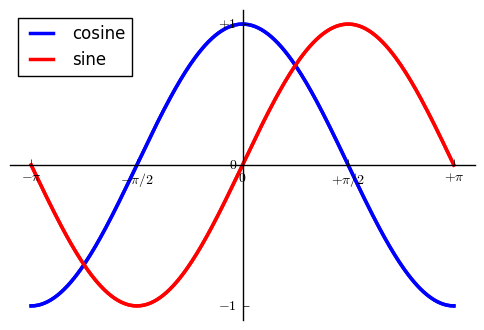

In [20]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

### New code
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")

plt.legend(loc='upper left')
### End of new code

plt.show()

### Annotate some points

Let’s annotate some interesting points using the annotate command. We chose the $\frac{2}{3}\pi$ value and we want to annotate both the sine and the cosine. We’ll first draw a marker on the curve as well as a straight dotted line. Then, we’ll use the annotate command to display some text with an arrow.

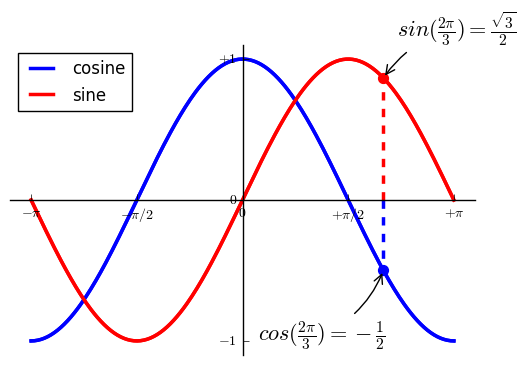

In [21]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")

plt.legend(loc='upper left')

### New code
t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
### End of new code

plt.show()

### Devil is in the details

The tick labels are now hardly visible because of the blue and red lines. We can make them bigger and we can also adjust their properties such that they’ll be rendered on a semi-transparent white background. This will allow us to see both the data and the labels.

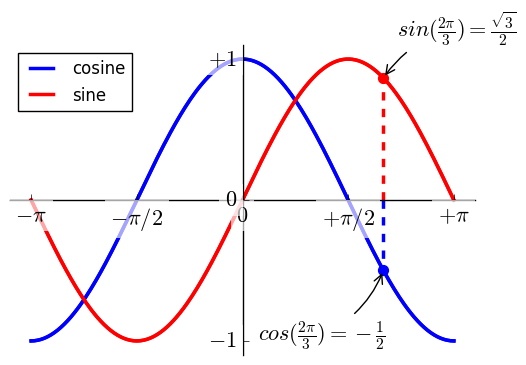

In [22]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")

plt.legend(loc='upper left')

t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

### New code
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))
### End of new code

plt.show()

### Exercise 1

Using the historical weather data we plotted above, plot it and try making it look prettier. Consider doing some of the following:
- add in a label for the x-axis
- set the range to something shorter
- plotting annual maximum and minimum on the same plot (you'll need to create some new columns for these data)
- labelling some interesting (or non-interesting points)
- change the colours in a way which presents the data well

### Exercise 2

Attempt to complete some of the exercises from the [SciPy lectures](http://www.scipy-lectures.org/intro/matplotlib/index.html#regular-plots) page. There's no need to do them all but try to do at least three or four.

Continue to the [next section](numerical operations.ipynb).